In [1]:
import geopandas as gpd
import altair as alt
import pandas as pd

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import DistanceMetric

In [5]:
# precint_footprint = gpd.read_file('..//data//Police Precincts.geojson')

trees = gpd.read_file('..//data//2015 Street Tree Census - Tree Data.geojson')

In [6]:
# Preprocess data
trees = trees.to_crs(epsg=4326) # Convert to longitude-latitude coordinate system

In [7]:

# Feature scaling
scaler = StandardScaler()
trees_scaled = scaler.fit_transform(trees[['longitude', 'latitude']])
# Apply clustering algorithm
db = DBSCAN(eps=0.0001, min_samples=2, metric='euclidean')
db.fit(trees_scaled)
labels = db.labels_

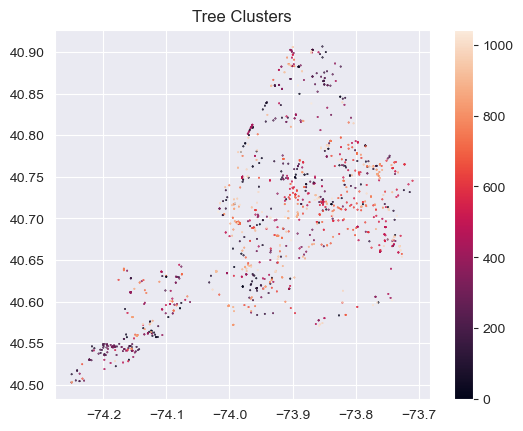

In [14]:
# Visualize the results
trees['labels'] = labels
# Remove trees with labels -1
trees_toplot = trees[trees['labels'] != -1]
trees_toplot.plot(column='labels', legend=True, markersize= 0.1)
plt.title('Tree Clusters')
plt.show()